<a href="https://colab.research.google.com/github/Chadliu123/TibameAI/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

ans: automobile


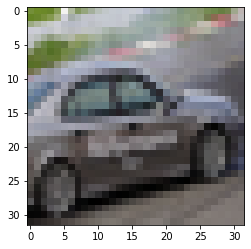

In [ ]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, x_train.shape[0]-1)
print("ans:", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
layers = [
    # 27(1 filter) * 64 + 64 = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 576(1 filter) * 128 + 128 = 73856 
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    # 1152(1 filter) * 256 + 256 =295168  
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [ ]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [ ]:
# epoch: 整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000 * 2 / 200次調整
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train,
     batch_size=100,
     epochs=100,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/100
450/450 - 4s - loss: 1.5190 - accuracy: 0.4458 - val_loss: 1.1211 - val_accuracy: 0.6110
Epoch 2/100
450/450 - 4s - loss: 1.0568 - accuracy: 0.6281 - val_loss: 0.9375 - val_accuracy: 0.6726
Epoch 3/100
450/450 - 4s - loss: 0.8622 - accuracy: 0.6978 - val_loss: 0.7736 - val_accuracy: 0.7328
Epoch 4/100
450/450 - 4s - loss: 0.7382 - accuracy: 0.7412 - val_loss: 0.7166 - val_accuracy: 0.7542
Epoch 5/100
450/450 - 4s - loss: 0.6322 - accuracy: 0.7796 - val_loss: 0.6923 - val_accuracy: 0.7680
Epoch 6/100
450/450 - 4s - loss: 0.5452 - accuracy: 0.8098 - val_loss: 0.7501 - val_accuracy: 0.7510
Epoch 7/100
450/450 - 4s - loss: 0.4609 - accuracy: 0.8384 - val_loss: 0.6815 - val_accuracy: 0.7788
Epoch 8/100
450/450 - 4s - loss: 0.3812 - accuracy: 0.8625 - val_loss: 0.6881 - val_accuracy: 0.7870
Epoch 9/100
450/450 - 4s - loss: 0.3169 - accuracy: 0.8880 - val_loss: 0.7216 - val_accuracy: 0.7828
Epoch 10/100
450/450 - 4s - loss: 0.2634 - accuracy: 0.9074 - val_loss: 0.7957 - val_accura

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7226 - accuracy: 0.7584


[0.722648561000824, 0.758400022983551]

In [ ]:
pre = model.predict_classes(x_test_norm)
print(pre.shape)
print(y_test.shape)
y_test_r = y_test.reshape(10000)
print(y_test_r.shape)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
(10000,)
(10000, 1)
(10000,)


array([3, 8, 8, ..., 5, 4, 7])

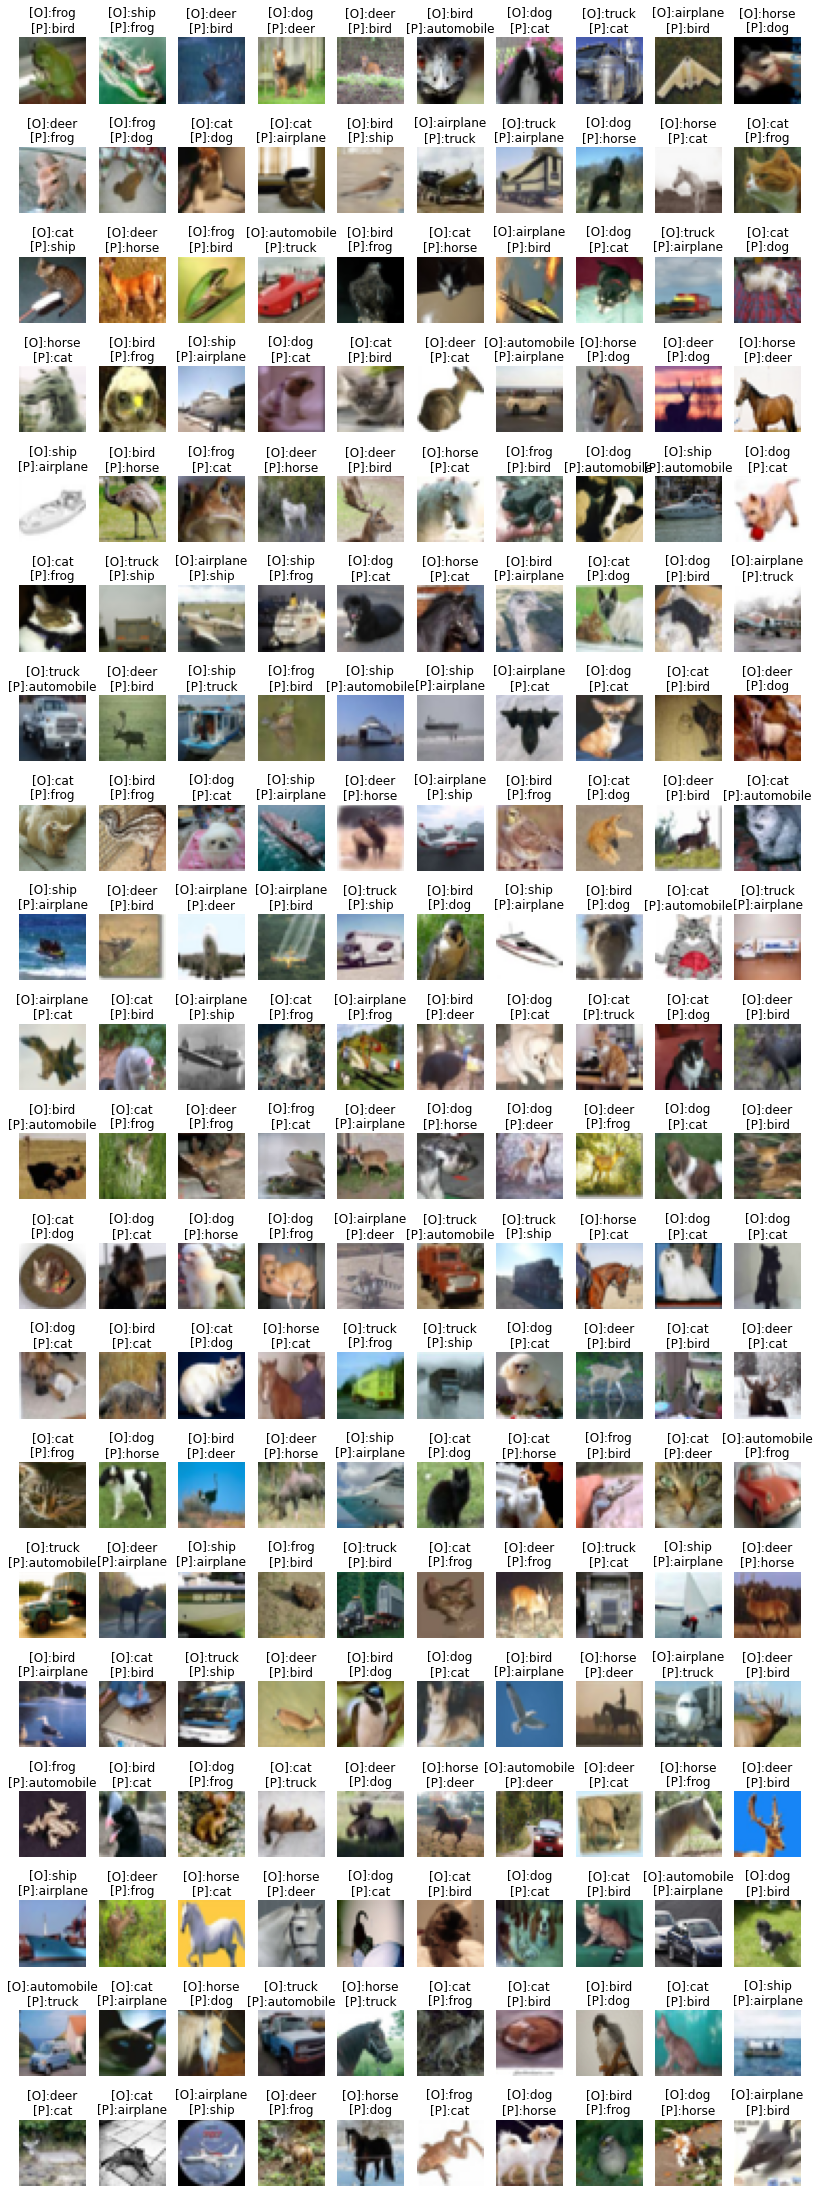

In [ ]:
# subplot(總高度, 總寬度, ith)
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
false_img = x_test[idx]
false_label = y_test_r[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

輸入網址:https://i2.kknews.cc/SIG=1vpgqh4/ctp-vzntr/1522901322969p0r4353or9.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


airplane 的機率是: 0.002
automobile 的機率是: 0.0
bird 的機率是: 0.0
cat 的機率是: 0.0
deer 的機率是: 0.0
dog 的機率是: 0.0
frog 的機率是: 0.0
horse 的機率是: 0.0
ship 的機率是: 0.998
truck 的機率是: 0.0
應該是: ship


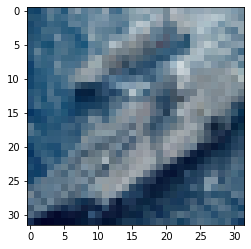

In [ ]:
# pip install pillow
import PIL
import requests
url = input("輸入網址:")
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36"
}
response = requests.get(url, stream=True, verify=False, headers=h)
img = PIL.Image.open(response.raw).resize((32, 32))
img_np = np.array(img)
test = img_np.reshape(1, 32, 32, 3) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
    print(trans[i], "的機率是:", round(p, 3))
ans = model.predict_classes(test)[0]
print("應該是:", trans[ans])
plt.imshow(img_np)